# **Waze**
Waze, a free navigation app owned by Google, makes it easier for drivers around the world to reach their destinations. Waze's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer.

# **Project Goal**
Develop a machine learning model to predict user churn. An accurate model will help prevent churn, improve user retention, and contribute to the growth of **Waze's** business.

This notebook aims to focus exclusively on **Hypothesis Testing** to gain insights into user behavior related to **Waze** app usage, specifically examining differences based on device type (**iPhone vs. Android**). While the broader project goal is to develop a **churn prediction model**, this specific analysis will explore and evaluate hypotheses to inform strategic decisions for enhancing user retention and business growth.

We have completed extensive **[Exploratory Data Analysis (EDA)](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis)**. Next, we will conduct a **two-sample t-test** to analyze mean differences in ride amounts between iPhone and Android users, providing insights into user behavior related to rides. Additionally, we plan to explore other variables such as sessions, total sessions, and more to further understand differences in user engagement based on device type. Subsequently, we will employ a **Chi-squared Test of Independence** to ascertain significant associations between categorical variables.

This project is part of the Google Advanced Data Analytics program, and the dataset used is curated by Google as part of this program.

## **Churn V/s Retained:**

Churn refers to users who have uninstalled the Waze app, whereas Retained users are those who continue to engage with the app and have not uninstalled it.




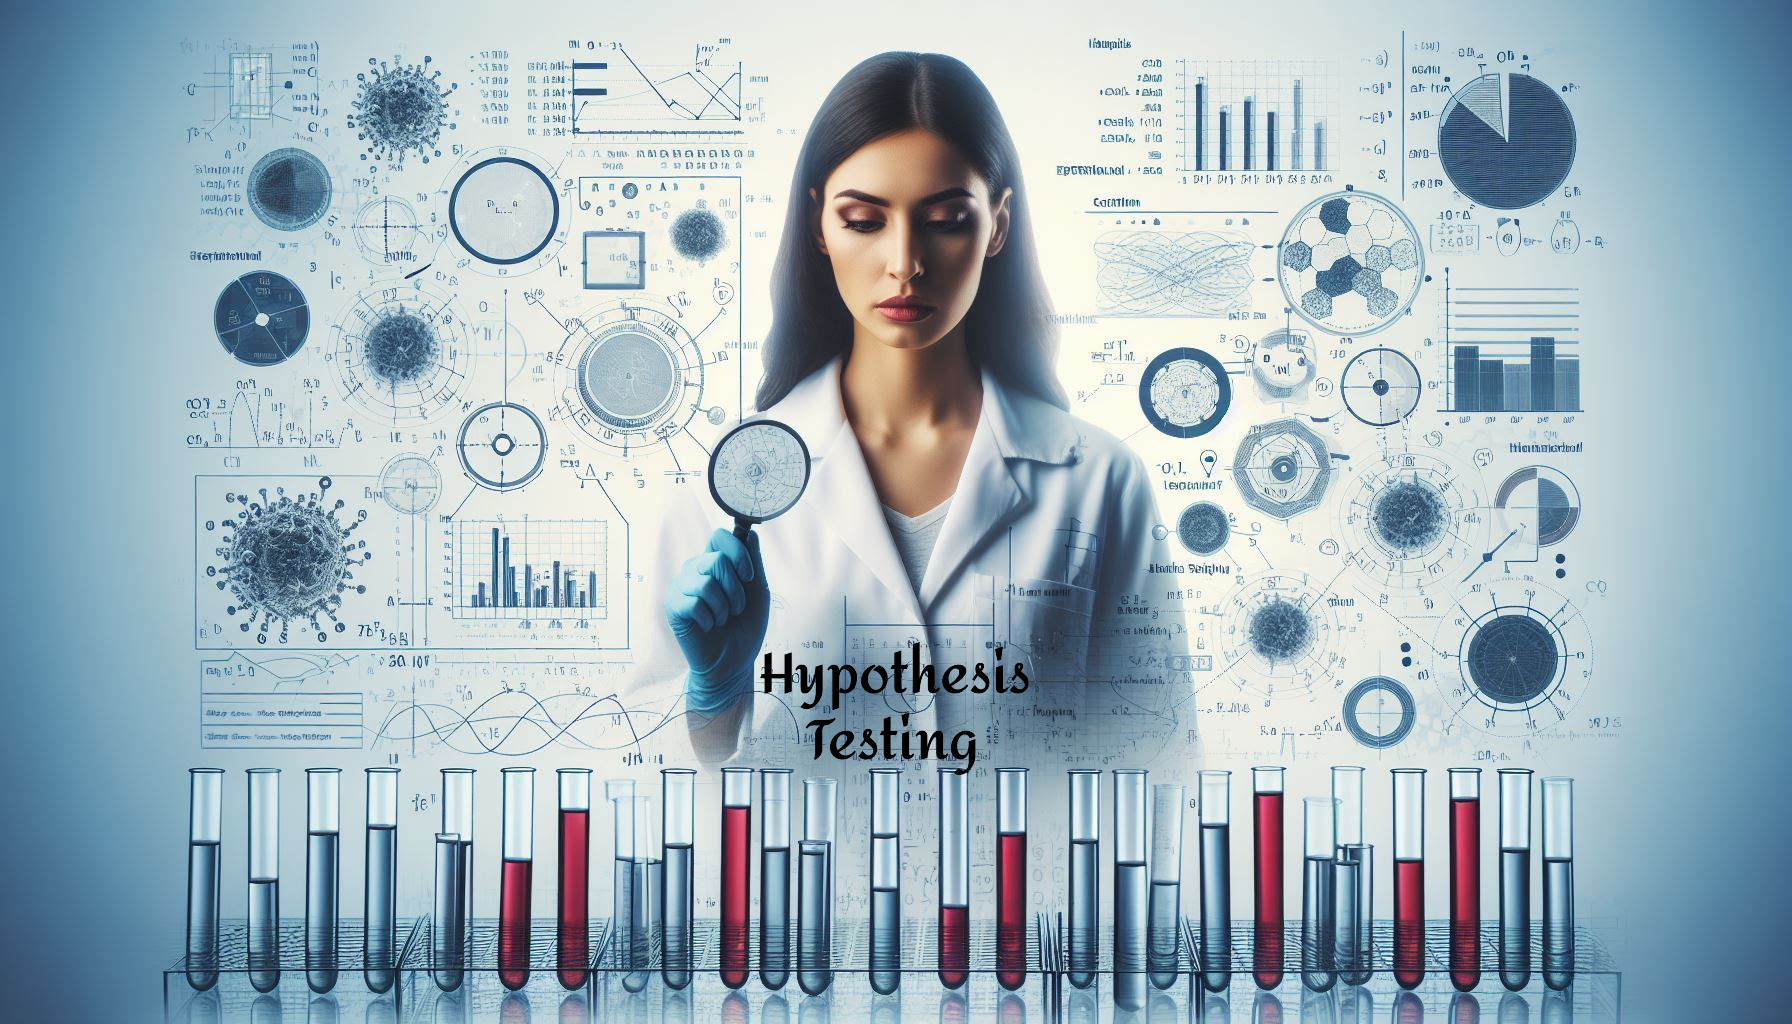

In [1]:
from IPython.display import Image
Image("../input/hypothesis-image/Hypothesis (3).png") 

# **What is Two-Sample T-test?**
A **two-sample t-test**, also known as an **independent samples t-test**, is a statistical method used to compare the means of two independent groups or samples. It helps determine whether there is a significant difference between the sample means of these two groups.

**For example:**

* Comparing the mean weights of two species of penguins.
* Analyzing the mean sales between two different states.

# **How to Formulate Hypothesis Tests for a Two-Sample T-test?**
**Null Hypothesis ($H_0$):** The population means of the two groups are equal.
* $H_0: \mu_1 = \mu_2$

**Alternative Hypothesis:** The alternative hypothesis can take different forms based on the research question:
1. **Two-Tailed Test:** The population means of the two groups are not equal.
 * $H_1: \mu_1 \neq \mu_2$
2. **One-Tailed Test:**
 * **Left-tailed:** The population mean of sample 1 is less than the mean of sample 2.
       * $H_1: \mu_1 < \mu_2$
 * **Right-tailed:** The population mean of sample 1 is greater than the mean of sample 2.
       * $H_1: \mu_1 > \mu_2$

  
# **How to Evaluate the Two-Sample T-Test Result?**

* If the **P-value** is **less** than the significance level (**usually 0.05**), **we reject the null hypothesis**. This suggests that the observed difference between the sample means is unlikely to have occurred by random chance alone, indicating a **statistically significant** difference.

* If the **P-value** is **greater** than the significance level (**0.05**), **we fail to reject the null hypothesis**. This implies that the observed difference between the sample means is **not statistically significant**, and we do not have enough evidence to conclude that the population means are different.

Before proceeding with the **two-sample t-test**, it's important to ensure that the test assumptions are met. Let's review these assumptions and identify any potential violations. If any assumptions are not met, we'll explore appropriate strategies to address them.

# **Assumptions Associated with the Two-Sample T-Test (Independent Samples T-Test):**
### **Random Sampling:**
Both samples used in the two-sample t-test should be obtained through a **random sampling process**. This ensures that the samples are **representative of the whole population** and that no systematic biases are introduced into the analysis.

### **Independence:**
The observations in one sample should be unrelated to or independent of the observations in the other sample. In our scenario, each user should exclusively belong to either the iPhone or Android group within their respective sample. If the same user appears in both samples, it can introduce dependencies that compromise the reliability of the t-test results.

### **Normality:**
Both samples should ideally follow a **normal distribution**. This assumption is crucial for t-tests because they rely on the assumption that the sampling distribution of the mean is approximately normal. If the data deviates significantly from normality, the p-values obtained from the t-test may not accurately reflect the true differences between the groups.

### **Homogeneity of Variances:**
The two samples should have roughly **similar variance or standard deviation**, ensuring that the variability within each group is comparable. This assumption is important for the t-test because unequal variances between groups can affect the accuracy of the test results. You can assess this assumption using statistical tests like **Levene's test**.



In [2]:
# Import standard operational packages
import pandas as pd
import numpy as np

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Import statistical packages
from scipy import stats
from scipy.stats import chi2_contingency

# Import packages for warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hypothesis-image/Hypothesis (3).png
/kaggle/input/waze-dataset-to-predict-user-churn/waze_dataset.csv


In [3]:
# Read Data
df = pd.read_csv('../input/waze-dataset-to-predict-user-churn/waze_dataset.csv', encoding = 'unicode_escape')

In [4]:
# Display Data
df.head()

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0  retained       283     226      296.748273                     2276   
1   1  retained       133     107      326.896596                     1225   
2   2  retained       114      95      135.522926                     2651   
3   3  retained        49      40       67.589221                       15   
4   4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  
0              1985.775061             28            19  Android  
1              3160.472914             13            11   iPhone  
2              1610.735904             14             8  Android  
3               587.196542              7             3   iPhone  
4              1219.555924             27            18  Android

Our earlier **[Exploratory Data Analysis (EDA)](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis)** revealed that several variables exhibit a right-skewed distribution. Let's delve deeper into these distributions to gain a better understanding.

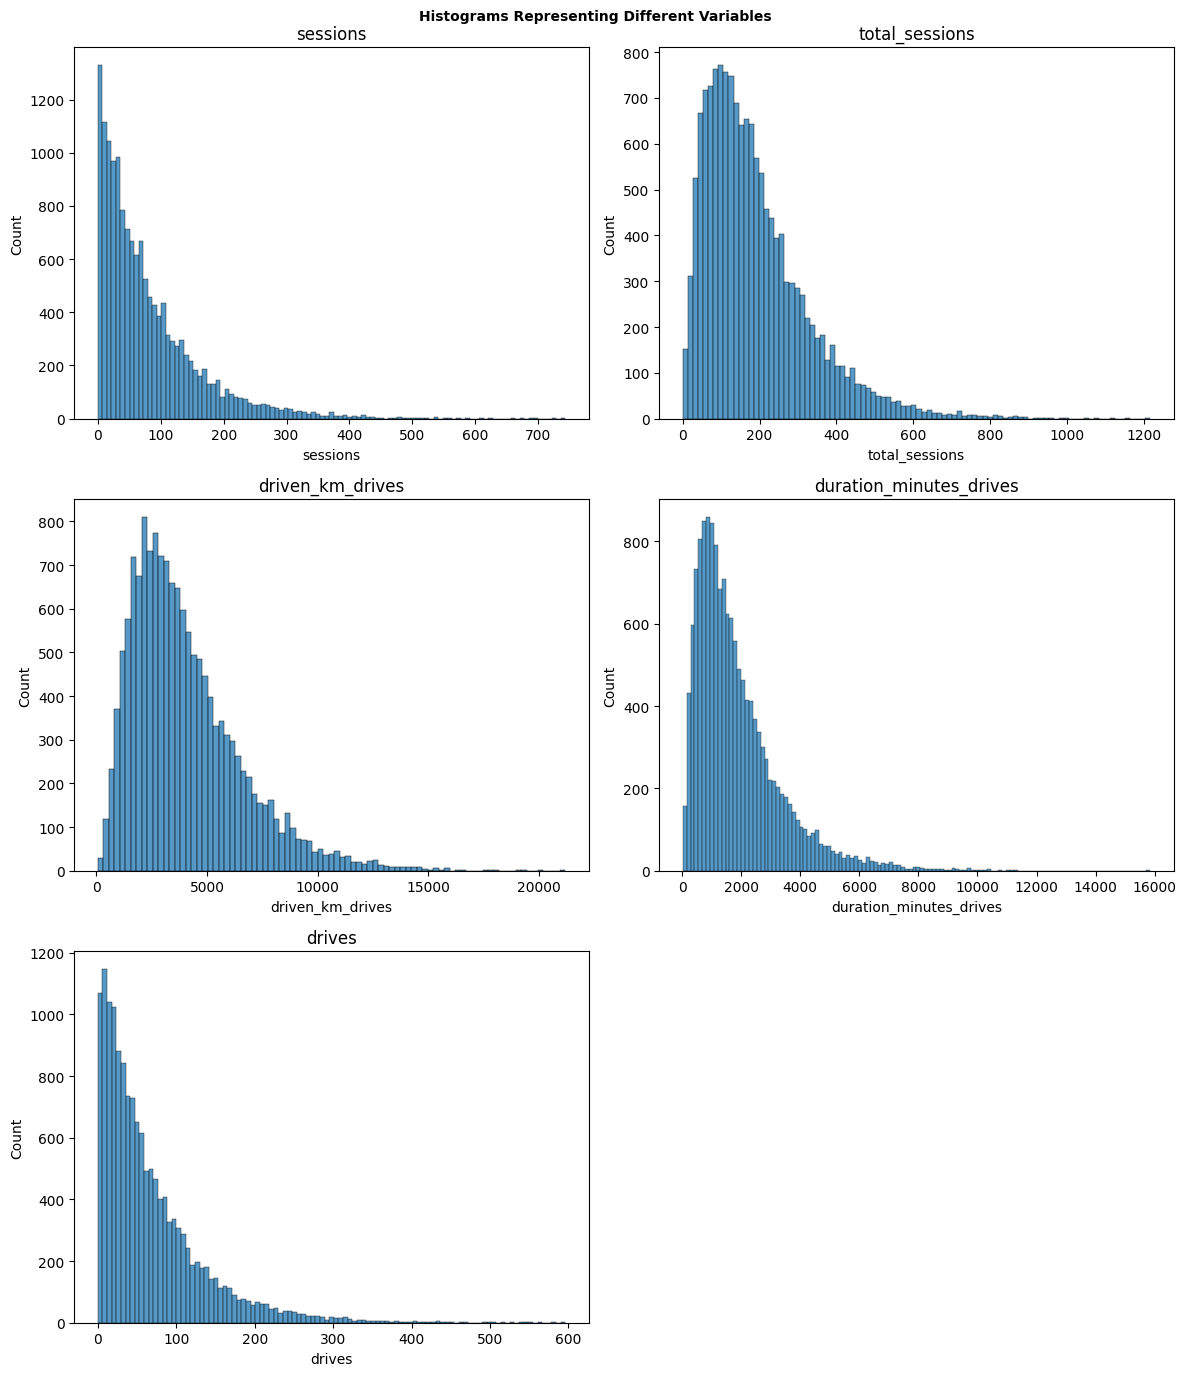

In [5]:
# List of variables to plot
variables = ['sessions', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives', 'drives']

# Create subplots for Histograms
fig, axs = plt.subplots(len(variables)//2 + 1, 2, figsize=(12, 14))
fig.suptitle('Histograms Representing Different Variables', size=10, weight='bold')

# Flatten the axes array to iterate over each subplot
axs = axs.flatten()

# Plot Histograms plots for each variable
for i, var in enumerate(variables):
    ax = axs[i]
    sns.histplot(df[var], ax=ax)
    ax.set_title(var)

# Hide extra subplots
for j in range(len(variables), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

* The plot above illustrates that all key variables exhibit significant right-skewness. Although our data is a random sample and the two groups (Android users vs. iPhone users) are independent, the assumption of normality is not met due to the non-normal distribution of our data.

* Additionally, there is no strong reason to assume that the two groups have the same variance, violating the assumption of homogeneity of variances. Given these considerations, we will proceed with a two-sample t-test using **Welch's t-test**.

**Welch's t-test** is specifically designed to handle unequal variances and robust to deviations from normality, making it suitable for our dataset.

We will begin by conducting a statistical analysis of **`drives`** based on **`device`** to determine if there is a significant association between ride counts and device type (**iPhone vs. Android**).

If the analysis reveals no statistically significant difference in the mean number of rides between iPhone and Android users, we will proceed to investigate the statistical significance of other variables.

In [6]:
# Create `map_dictionary`
map_dictionary = {'iPhone':1, 'Android':2}

# Create new variable `device_type` column
df['device_type'] = df['device']

# Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

# Display
df[['device', 'device_type']].head()

device  device_type
0  Android            2
1   iPhone            1
2  Android            2
3   iPhone            1
4  Android            2

# **Hypothesis Testing**
**Steps for Conducting Hypothesis Test:**
1. State the null hypothesis and the alternative hypothesis
2. Choose a signficance level
3. Find the p-value
4. Reject or fail to reject the null hypothesis


# **Hypothesis: Examining the Statistically Significant Difference in the Mean Number of Rides between iPhone Users and Android Users**

## **Null Hypothesis $H_0$:**
* There is no difference in the mean number of drives between users who use iPhone devices and users who use Androids.

## **Alternative Hypothesis $H_1:$**
* There is a difference in the mean number of drives between users who use iPhone devices and users who use Androids.

### **Significance Level:**
* **0.05 or 5%**

In [7]:
# Isolate the `drives` column for iPhone users
iphone_drives = df[df['device_type']==1]['drives']

# Isolate the `drives` column for Android users
android_drives = df[df['device_type']==2]['drives']

In [8]:
# Average number of `drives` for each device type
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

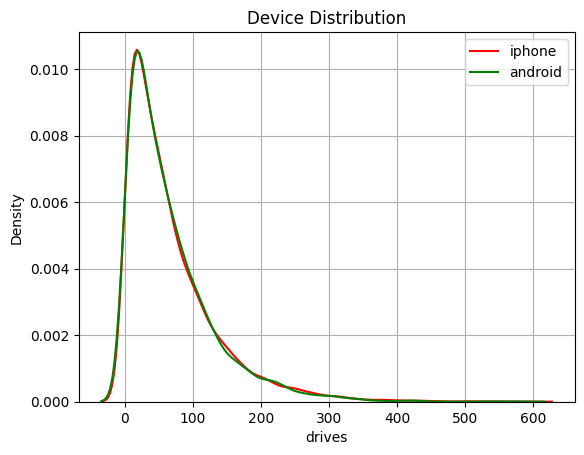

In [9]:
# Create kdeplot to compare distribution of `drives` between iPhone and Android users
sns.kdeplot(iphone_drives, color='red')
sns.kdeplot(android_drives, color='green')
plt.grid()
plt.legend(['iphone', 'android'])
plt.title('Device Distribution');

The KDE plots of iphone and android are overlapping substantially, it suggests that the distributions of these two groups are similar. The average for both devices for **`drive`** seems approximately similar.

**Technical note:**
* By default, the **stats.ttest_ind()** function assumes equal population variances (**equal_var=True**). However, in our case, it's unlikely that the variances are equal between our two groups.
* Additionally, our data is right-skewed and does not follow a normal distribution. Therefore, we need to set the **equal_var parameter** to **False** when performing the two-sample t-test.
* This adjustment enables us to use **Welch's t-test**, which is robust against unequal variances and non-normal data distributions.
* By taking this approach, we can conduct meaningful comparisons despite the statistical challenges posed by our dataset.

In [10]:
# Perform the t-test
stats.ttest_ind(a=iphone_drives, b=android_drives, equal_var=False)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

## **Result**
The p-value of **0.143** is higher than the significance level of 0.05, indicating that the difference in the mean number of drives (**`drives`**) between iPhone users and Android users is **not statistically significant** at the **0.05** significance level.

As a result, **we fail to reject the null hypothesis**, suggesting that there is no strong evidence against the null hypothesis.

Therefore, it implies that the underlying drive patterns, in terms of frequency or behavior, do not appear to vary significantly based solely on whether a user uses an iPhone or an Android device.

Now, let's explore additional variables including **`sessions`**, **`total_sessions`**, **`driven_km_drives`**, and **`duration_minutes_drives`**
based on **`device`**. We aim to understand how user behavior varies across these variables and identify any differences between **iPhone** and **Android** users.

To begin, we will create **KDE plots** to understand the distribution of each feature. Following this, we will conduct a **Two-Sample T-test** using a **helper function** that iterates over each feature, computes the **T-statistic** and **P-value**, and then compiles the results into a dataframe.

The dataframe will include columns for **Features**, **T-statistic**, **P-value**, and **Significance**. The significance column will indicate whether the p-value is less than 0.05 (**Significant**) or greater than 0.05 (**Not Significant**).

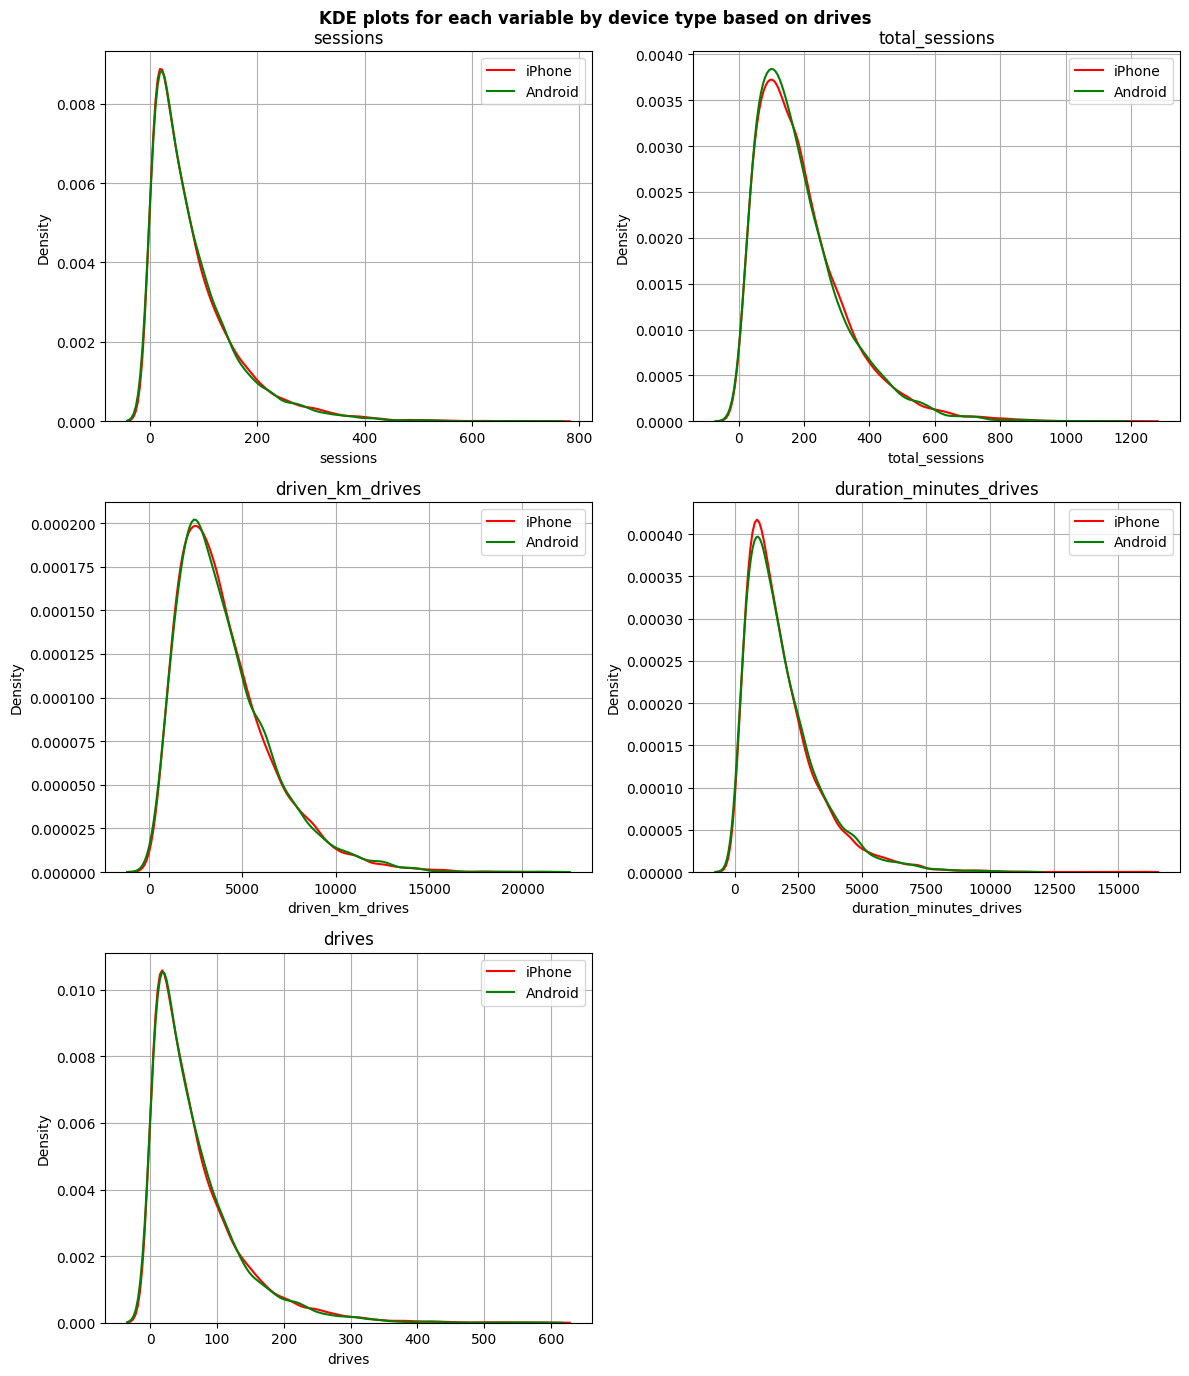

In [11]:
# List of variables to plot
variables = ['sessions', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives', 'drives']

# Create subplots for KDE plots
fig, axs = plt.subplots(len(variables)//2 + 1, 2, figsize=(12, 14))
fig.suptitle('KDE plots for each variable by device type based on drives', size=12, weight='bold')

# Flatten the axes array to iterate over each subplot
axs = axs.flatten()

# Plot KDE plots for each variable based on device 
for i, var in enumerate(variables):
    ax = axs[i]
    sns.kdeplot(df[df['device_type']==1][var], color='red', ax=ax, label='iPhone')
    sns.kdeplot(df[df['device_type']==2][var], color='green', ax=ax, label='Android')
    ax.set_title(f'{var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid()

# Hide extra subplots
for j in range(len(variables), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Isolate Key Variables
df1 = df[['device', 'activity_days', 'driving_days', 'sessions', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives', 'drives']]

# Calculate the average of numeric variables grouped by device type
df1.groupby('device').mean(numeric_only=True)

activity_days  driving_days   sessions  total_sessions  \
device                                                            
Android      15.649897     12.217383  79.280833      187.820417   
iPhone       15.474979     12.159222  81.378929      191.145304   

         driven_km_drives  duration_minutes_drives     drives  
device                                                         
Android       4041.908059              1869.570741  66.231838  
iPhone        4037.927030              1856.242335  67.859078

* When **KDE plots** are overlapping with very slight differences between the two lines, it suggests that the distributions of the variables for iPhone and Android users are quite similar. The overlapping lines indicate that the data points and density estimates for both groups are closely aligned, with minimal discrepancy between them.

* The minor differences in mean values suggest subtle variations between the groups (iPhone vs. Android users), although these differences are not substantial enough to claim statistical significance

The next step would involve testing whether these observed differences in variables are statistically significant with respect to the device type (iPhone vs. Android).

# **Hypothesis: Examining Differences in Means Across Variables by Device Type**

**Create a Helper Function to Conduct Two-Sample T-Test**




In [13]:
def conduct_t_test(df, feature, device_type_col='device_type', device_type_1=1, device_type_2=2):
    # Isolate the feature column for iPhone users
    iphone_data = df[df[device_type_col] == device_type_1][feature]

    # Isolate the feature column for Android users
    android_data = df[df[device_type_col] == device_type_2][feature]

    # Perform the two-sample t-test
    result = stats.ttest_ind(a=iphone_data, b=android_data, equal_var=False)

    return result

features_to_test = ['sessions', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives', 'drives']

# Create an empty list to store test results
results = []

# Iterate over each feature and conduct the t-test
for feature in features_to_test:
    test_result = conduct_t_test(df, feature)
    # Determine if the result is significant based on the p-value (significance level = 0.05)
    if test_result.pvalue < 0.05:
        significance = "Significant"
    else:
        significance = "Not Significant"

    # Append the results to the list
    results.append({
        'Feature': feature,
        'T-statistic': test_result.statistic,
        'P-value': test_result.pvalue,
        'Significance': significance
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

Feature  T-statistic   P-value     Significance
0                 sessions     1.540944  0.123358  Not Significant
1           total_sessions     1.438219  0.150400  Not Significant
2         driven_km_drives    -0.093189  0.925755  Not Significant
3  duration_minutes_drives    -0.541648  0.588072  Not Significant
4                   drives     1.463523  0.143352  Not Significant

## **Result**
* The two-sample t-tests conducted on various variables, including **`sessions`**, **`total_sessions`**, **`driven_kilometers`**, and **`duration_in_minutes`** did not reveal any statistically significant differences in means between iPhone users and Android users.

* All obtained p-values were greater than **0.05**, leading to the **failure to reject the null hypothesis of equal means**.

* These results suggest that user behavior in terms of **app engagement**, **driving duration**, and **driving distance** does not depend on whether a user uses an **iPhone** or an **Android** device.

# **Chi-Squared Test of Independence**

The chi-squared test of independence is a statistical hypothesis test used to analyze categorical data and assess whether there is a significant association between two categorical variables.

It examines whether the occurrence of one categorical variable is related to the occurrence of another, or if they are independent. The test utilizes a contingency table (cross-tabulation) to compare observed frequencies with expected frequencies under the assumption of independence.

# **Assumptions of the Chi-squared Test of Independence:**
### **Categorical Data:**
The chi-squared test of independence requires that both variables under examination are categorical and data must be frequency counts or proportions.

### **Independence of observations:**
Each observation in the dataset should be independent of the others, meaning that the selection or occurrence of one observation should not be influenced by another.

### **Random sampling:**
The data for both categorical variables should be obtained through a random sampling method to ensure that the sample is representative of the whole population. It reduces the risk of bias and provides more reliable results.

### **Expected cell frequencies:**
Each cell in the contingency table (cross-tabulation) should ideally have an expected count of at least **5** for reliable results in the chi-squared test. It's recommended that at least 80% of the cells meet this criterion to ensure the test's accuracy and robustness.

### **Mutually Exclusive Cells in Contingency Table:**
Cells in the contingency table are mutually exclusive, meaning each observation is uniquely categorized into one cell of the table.

### **Assumptions Check:**
We will conduct three **chi-squared tests of independence** for the following pairs: **`driving_days`** & **`device`**, **`activity_days`** & **`device`**, and **`label`** & **`device`**.

* **`driving_days`** and **`activity_days`** are **discrete variables** representing counts over **30** and **31** days, respectively.
* **`Label`** is a categorical variable with two groups- **churned** and **retained**.

Our data was obtained through **random sampling**. The expected cell frequencies are greater than **5**, and cells in the contingency table are mutually exclusive (whether the cells in the contingency table are mutually exclusive is examined after the creation of the contingency table).



In [14]:
# Countplot
plt.figure(figsize=(10, 5)),
sns.countplot(data=df, x='driving_days', hue='device')
plt.title('Data Distribution of driving_days based on device', size=10, weight='bold');

The data distribution between **iPhone** and **Android** users exhibits noticeable similarities in trends, though not identical. While this data visualization provides insights, it does not confirm the statistical significance between both variables.

# **Chi Squared Test for Device and Driving Days**

## **Null Hypothesis** ($H_0$):
* There is no association between **`device`** and **`driving_days`**. In other words, the distribution of **`driving_days`** is the same across both **`device`** categories (**Android** and **iPhone**).

## **Alternative Hypothesis** ($H_1$):
* There is an association between **`device`** and **`driving_days`**. The distribution of **`driving_days`** differs between the **`device`** categories (**Android** and **iPhone**).

In [15]:
# Create contingency tables for driving_days
contingency_driving_days = pd.crosstab(df['device'], df['driving_days'])

# Perform chi-squared test for driving_days
chi2, p_value, dof, expected = chi2_contingency(contingency_driving_days)

# Print results
print("Chi-squared test for driving_days:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-squared test for driving_days:
Chi2 Statistic: 42.329939265329415
P-value: 0.06704544040759919


In [16]:
# View all columns
pd.set_option('display.max_columns', None)

# Display contingency_driving_days table
contingency_driving_days

driving_days   0    1    2    3    4    5    6    7    8    9    10   11   12  \
device                                                                          
Android       343  187  221  193  167  198  207  194  207  211  190  210  200   
iPhone        681  361  356  390  328  363  363  340  367  344  406  367  335   

driving_days   13   14   15   16   17   18   19   20   21   22   23   24   25  \
device                                                                          
Android       224  204  175  214  215  225  216  208  183  174  123  141  118   
iPhone        333  376  345  384  400  376  392  360  325  310  284  224  172   

driving_days   26   27  28  29  30  
device                              
Android        81   48  28  15   7  
iPhone        148  121  83  33   5

## **Result**
* The obtained p-value of **0.067** is greater than the significance level of **0.05**. Therefore, we fail to reject the null hypothesis, indicating that we do not have sufficient evidence to conclude a significant association between **`device`** and **`driving_days`**.

* While the chi-squared test result does not provide strong evidence to reject the null hypothesis of independence at a typical significance level, the relatively low p-value (close to 0.05) suggests a potential trend or association that may warrant further investigation.

Now let's move on to our next pair **`activity_days`** and **`device`**.

In [17]:
# Countplot
plt.figure(figsize=(10, 5)),
sns.countplot(data=df, x='activity_days', hue='device')
plt.title('Data Distribution of activity_days based on device', size=10, weight='bold');

# **Chi Squared Test for Device and Activity Days**

## **Null Hypothesis** ($H_0$):
* There is no association between **`device`** and **`activity_days`**. In other words, the distribution of **`activity_days`** is the same across both **`device`** categories (**Android** and **iPhone**).

## **Alternative Hypothesis** ($H_1$):
* There is an association between **`device`** and **`activity_days`**. Alternatively, the distribution of **`activity_days`** differs between the **`device`** categories (**Android** and **iPhone**).

In [18]:
# Create contingency tables for activity_days
contingency_activity_days = pd.crosstab(df['device'], df['activity_days'])

# Perform chi-squared test for driving_days
chi2, p_value, dof, expected = chi2_contingency(contingency_activity_days)

# Print results
print("Chi-squared test for activity_days:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-squared test for activity_days:
Chi2 Statistic: 23.91099439425829
P-value: 0.8141596547131362


In [19]:
# Display contingency_activity_days table
contingency_activity_days

activity_days   0    1    2    3    4    5    6    7    8    9    10   11  \
device                                                                      
Android         81  177  182  159  155  179  187  159  167  150  170  172   
iPhone         162  333  309  315  306  327  296  334  319  308  322  297   

activity_days   12   13   14   15   16   17   18   19   20   21   22   23  \
device                                                                      
Android        168  180  148  166  182  205  166  168  163  190  155  169   
iPhone         289  293  301  307  298  341  318  297  311  335  314  287   

activity_days   24   25   26   27   28   29   30   31  
device                                                 
Android        166  174  185  170  195  180  164   95  
iPhone         333  304  288  290  327  345  315  151

## **Result**
* With a p-value greater than the significance level of 0.05, we **fail to reject the null hypothesis**. This suggests that user engagement, as measured by the number of days the app is opened, **does not exhibit a statistically significant difference** based on the device type.

* This analysis indicates that users of **iPhones** and **Android** devices engage with the app similarly in terms of their activity across different days of the month.

# **Chi Squared Test for Label and Device**

## **Null Hypothesis ($H_0$):**
* There is no association between the **`label`** (**churn and retained**) and **`device`** (**iPhone and Android**). In other words, the distribution of **`label`** is independent of the device categories.

## **Alternative Hypothesis ($H_1$):**
* There is an association between the **`label`** (**churn and retained**) and **`device`** (**iPhone and Android**). Alternatively, the distribution of **`label`** differs between the device categories.

In [20]:
# Countplot
plt.figure(figsize=(7,5))
a = sns.countplot(data=df, x='label', hue='device',
                  palette = 'gist_rainbow_r')
plt.title('Distribution of Labels (Churned v/s Retain) Based on Device', size=10, weight='bold')

for bars in a.containers:
  a.bar_label(bars)

In [21]:
# Create a contingency table between 'device' and 'label'
contingency_table = pd.crosstab(df['device'], df['label'])
contingency_table

label    churned  retained
device                    
Android      891      4183
iPhone      1645      7580

In [22]:
891+4183+1645+7580

14299

During our **[Exploratory Data Analysis (EDA)](https://www.kaggle.com/code/lekhatopil/waze-exploratory-data-analysis)**, we identified **700 missing values** in the **`label`** column. These missing values were not dropped from our dataset. When creating the contingency table using **pd.crosstab**, the function automatically excluded these null rows, focusing only on the available data for the analysis.

In [23]:
# Perform chi-square test on the contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-squared test for label:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-squared test for label:
Chi2 Statistic: 0.14772271238945212
P-value: 0.7007211845963164


## **Result**
* Based on the results, the p-value of **0.70** is greater than the significance level of **0.05**. Therefore, we **fail to reject the null hypothesis**, indicating no significant association between the **`label`** (**churned or retained**) and the **`device`** (A**ndroid or iPhon**e).

* This suggests that the distribution of churned and retained users **does not differ significantly** based on the type of device used. Consequently, retention behavior appears to be independent of the type of device users have.



# **What business insights can we draw from our hypothesis testing results across multiple tests?**
* Based on our analysis, user behavior metrics such as drives, sessions, total sessions (total sesssion since the user onboarded), driving duration, and distance covered do not exhibit significant differences and indicate similar trend and pattern between iPhone and Android users.

* Our analysis revealed no significant association between activity days and driving days across both device categories. Furthermore, we did not identify any evidence linking **`device`** (**iPhone or Android**) to user retention behavior (**churned or retained**).

# **Business Implications**
This suggests that the type of device used (iPhone or Android) does not appear to be a distinguishing factor influencing user behavior or churn in these aspects.

# **Next Steps for Investigation:**
To gain a deeper understanding of user behavior and churn, further investigation is needed. Specifically, we require more data to assess whether the user interface for the Waze app on both devices is consistent or differs, which could provide valuable insights.


